In [725]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from scipy import io
from scipy.special import expit
from save_csv import results_to_csv

In [49]:
# Problem 2 helper code

X = np.array([[0.2, 3.1, 1.0],
              [1.0, 3.0, 1.0],
              [-0.2, 1.2, 1.0],
              [1.0, 1.1, 1.0]])
w = np.array([-1, 1, 0])
y = np.array([1, 1, 0, 0])

def sigmoid(x):
    return 1/(1+np.exp(-x))

s = sigmoid(np.dot(X, w))
print(s)

[0.94784644 0.88079708 0.80218389 0.52497919]


In [50]:
def update_w(w):
    diag = [x*(1-x) for x in s]
    omega = np.diag(diag)
    mat = np.matmul(X.T, omega)
    mat = np.matmul(mat, X)
    mat = np.linalg.inv(mat)
    mat = np.matmul(mat, X.T)
    mat = np.matmul(mat, y - s)
    return w + mat

In [52]:
w = update_w(w)
print(w)
s = sigmoid(np.dot(X,w))
print(s)

[ 1.36602464  4.15753654 -9.19961627]
[0.98132929 0.99042537 0.01116463 0.03695848]


### Problem 3.2

In [718]:
# Problem 3.2

data = io.loadmat("data/data.mat")
print("\nloaded wine data!")
print("training_data: ", data['X'].shape)
print("training_label: ", data['y'].shape)

wine = data['X']
label = data['y']

np.random.seed(69420)
wine = np.concatenate((wine, label), axis=1)
np.random.shuffle(wine)

#normalize X
l_2 = [np.linalg.norm(x) for x in X]
normalized = []
for i in range(len(X)):
    x = X[i]
    if l_2[i] != 0:
        x = [y / l_2[i] for y in x]
    normalized.append(x[:])
X = np.array(normalized)

X = wine[:, :-1]
X = np.concatenate((X, np.array(6000 * [[1]])), axis=1)
y = wine[:, -1:]
y = y.ravel()
print("X: ", X.shape)
print("y: ", y.shape)


loaded wine data!
training_data:  (6000, 12)
training_label:  (6000, 1)
X:  (6000, 13)
y:  (6000,)


In [710]:
def update_s(w):
    return expit(np.dot(X,w))

def update_w(w, s):
    first = np.matmul(X.T, y-s)
    second = reg * w
    return w + step * (first - second)

def cost(w, s):
    first = np.dot(y, np.log(np.clip(s, 1e-10, 1 - 1e-10)))
    second = np.dot(np.ones(6000) - y, np.log(np.clip(np.ones(6000) - s, 1e-10, 1 - 1e-10)))
    third = 0.5 * reg * (np.linalg.norm(w)**2)
    
    return - first - second + third

step = 1e-07
reg = 1e-02

In [711]:
costs = []
w = np.zeros(13)
for i in range(20000):
    s = update_s(w)
    costs.append(cost(w,s))
    w = update_w(w, s)

In [712]:
print(costs[-1])

1001.1500495564111


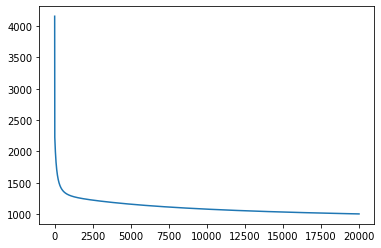

In [713]:
plt.plot(range(20000), costs)

### Problem 3.6

In [727]:
data = io.loadmat("data/data.mat")
X_test = data['X_test']
X_test = np.concatenate((X_test, np.array(len(X_test) * [[1]])), axis=1)
s = sigmoid(np.dot(X_test, w))
pred = np.array([1 if x > 0.5 else 0 for x in s])

In [728]:
results_to_csv(pred)

### Problem 3.4

In [667]:
def update_s(w):
    return expit(np.dot(X,w))

def update_w(i, w, s):
    first = X[i] * (y[i] - expit(np.dot(X[i], w)))
    second = 2 * reg * w
    return w + step * (first - second)

def cost(w, s):
    first = np.dot(y, np.log(np.clip(s, 1e-10, 1 - 1e-10)))
    second = np.dot(np.ones(6000) - y, np.log(np.clip(np.ones(6000) - s, 1e-10, 1 - 1e-10)))
    third = 0.5 * reg * (np.linalg.norm(w)**2)
    
    return - first - second + third

step = 1e-05
reg = 1e-09

In [668]:
costs = []
w = np.zeros(13)
for i in range(10000):
    s = update_s(w)
    costs.append(cost(w,s))
    w = update_w(i%6000, w, s)

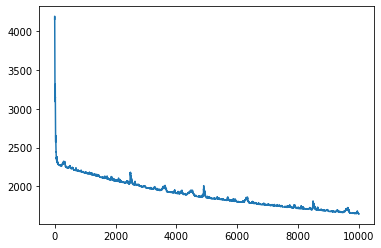

In [669]:
plt.plot(range(10000), costs)

In [670]:
costs[-1]

1642.6098337746778

### Problem 3.5

In [626]:
delta = 1e-01
costs = []
w = np.zeros(13)
for i in range(1, 10001):
    step = delta/i
    s = update_s(w)
    costs.append(cost(w,s))
    w = update_w(i%6000, w, s)

In [627]:
costs[-1]

1333.7603263737797

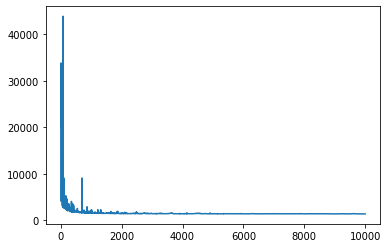

In [628]:
plt.plot(range(10000), costs)